This Notebook is prepared to analyze, visualiza and predict the stocks price using the time series recurrent neural network technique (LSTM) using the past 60 days closing stock price. 

In [1]:

# importing all necessory libraries
%matplotlib inline
import os
import math

import pandas_datareader.data as web
from datetime import datetime
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import matplotlib.dates as mpl_dates
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential



In [4]:
df = pd.read_csv('data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,4897.649902,4903.089844,4846.979980,4903.089844,4903.089844,2218420000
1,2016-01-05,4917.839844,4926.729980,4872.740234,4891.430176,4891.430176,1927380000
2,2016-01-06,4813.759766,4866.040039,4804.689941,4835.759766,4835.759766,2168620000
3,2016-01-07,4736.399902,4788.020020,4688.169922,4689.430176,4689.430176,2552590000
4,2016-01-08,4722.020020,4742.569824,4637.850098,4643.629883,4643.629883,2288750000
...,...,...,...,...,...,...,...
1254,2020-12-24,12791.540039,12833.549805,12767.639648,12804.730469,12804.730469,3305950000
1255,2020-12-28,12914.639648,12930.889648,12827.450195,12899.419922,12899.419922,5076340000
1256,2020-12-29,12965.389648,12973.330078,12821.959961,12850.219727,12850.219727,4680780000
1257,2020-12-30,12906.509766,12924.929688,12857.759766,12870.000000,12870.000000,5292210000


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df = df.drop(columns=['Date'])

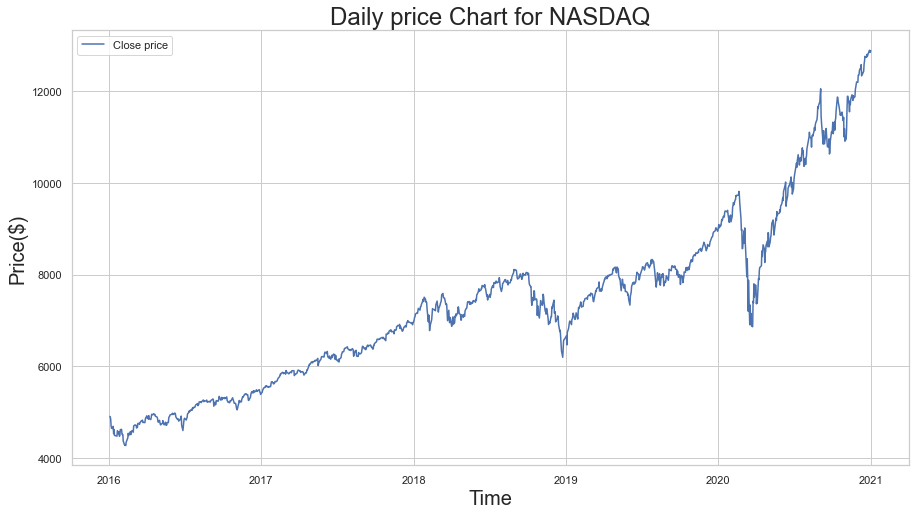

In [11]:
# closing price history chart

sns.set_theme(style="whitegrid")
plt.figure(figsize = (15, 8))
plt.plot(df['Close'], label = 'Close price')
plt.title('Daily price Chart for NASDAQ' , fontsize = 24)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Price($)', fontsize = 20)
plt.legend()
plt.show()


In [12]:
# creating a numpy array for closing price only
data = df.filter(['Close'])

close = data.values

# setting the train-test ratio
len_train = math.ceil(len(close) * 0.7)
len_train

882

In [13]:
# transforming closing price with min-max scaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_close = scaler.fit_transform(close)
scaled_close

array([[0.07370334],
       [0.07235268],
       [0.06590381],
       ...,
       [0.99430064],
       [0.99659199],
       [0.99870958]])

In [14]:
# train-test split
train_data = scaled_close[0:len_train, :]

x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    # checking data for first pass
    if (i <= 60):
        print(x_train)
        print('*******')
        print(y_train)
    # checking data for second pass    
    if (i <= 61):
        print(x_train)
        print('*******')
        print(y_train)

[array([0.07370334, 0.07235268, 0.06590381, 0.04895296, 0.04364744,
       0.04299414, 0.04854633, 0.03002813, 0.04033095, 0.02566789,
       0.02433923, 0.02372988, 0.02377276, 0.03757166, 0.02915124,
       0.03484822, 0.02332212, 0.02778316, 0.04020934, 0.04095303,
       0.02897284, 0.02750051, 0.02811676, 0.01115545, 0.00195888,
       0.0002224 , 0.00194032, 0.        , 0.00818642, 0.01959091,
       0.03095485, 0.02556596, 0.02752252, 0.03518879, 0.02742404,
       0.03194526, 0.03653141, 0.03748941, 0.03372229, 0.04897264,
       0.05057353, 0.05103689, 0.05214897, 0.05113305, 0.04424865,
       0.04720953, 0.04579399, 0.05579217, 0.05600179, 0.0534985 ,
       0.05758769, 0.05886425, 0.06125747, 0.06278891, 0.06427051,
       0.05815411, 0.05869163, 0.05791434, 0.06716188, 0.06978796])]
*******
[0.06985284220377663]
[array([0.07370334, 0.07235268, 0.06590381, 0.04895296, 0.04364744,
       0.04299414, 0.04854633, 0.03002813, 0.04033095, 0.02566789,
       0.02433923, 0.0237298

In [15]:
# converting x_train and y_train to numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train.shape

(822, 60)

In [16]:
# reshaping the data

x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))
x_train.shape

(822, 60, 1)

In [101]:
# model fitting

from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

model = tf.keras.Sequential()

model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1), activation='relu'))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(50))
model.add(Dense(1))
# compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [102]:
# model training
model.fit(x_train, y_train, batch_size = 2, epochs = 10)

Epoch 1/10
411/411 [==============================] - 18s 37ms/step - loss: 0.0017
Epoch 2/10
411/411 [==============================] - 15s 36ms/step - loss: 4.2117e-04
Epoch 3/10
411/411 [==============================] - 15s 36ms/step - loss: 3.8810e-04 0s - loss:
Epoch 4/10
411/411 [==============================] - 15s 36ms/step - loss: 3.0167e-04
Epoch 5/10
411/411 [==============================] - 15s 36ms/step - loss: 2.7884e-04
Epoch 6/10
411/411 [==============================] - 15s 36ms/step - loss: 2.3938e-04
Epoch 7/10
411/411 [==============================] - 15s 36ms/step - loss: 2.6753e-04
Epoch 8/10
411/411 [==============================] - 15s 36ms/step - loss: 1.9820e-04
Epoch 9/10
411/411 [==============================] - 15s 36ms/step - loss: 1.7881e-04
Epoch 10/10
411/411 [==============================] - 15s 36ms/step - loss: 1.6306e-04


the above parameters are fitted after a hit and trial process to get the minimum squared error

In [103]:
# creating the test data

test_data = scaled_close[len_train - 60: , :]

x_test = []
y_test = close[len_train: , :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [104]:
# convert test data to numpy array and reshaping

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [105]:
# predict output with model
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [106]:
# rms error
rmse = np.sqrt(np.mean(pred - y_test)**2 ) 
rmse

113.60894893385282

C:\Users\Mohit\AppData\Local\Temp/ipykernel_4992/2434356181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


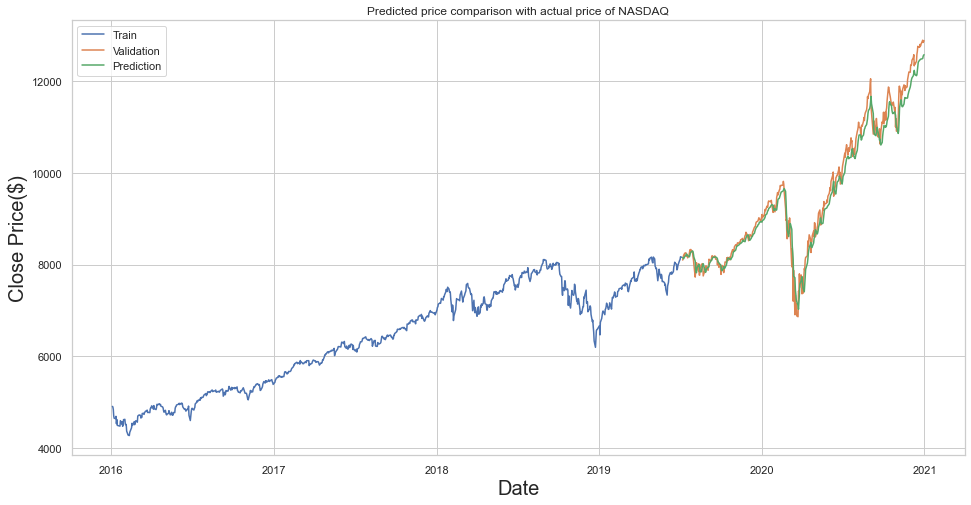

In [107]:
# plotting the predicted price with actual price

# setting the data to plot
train = data[:len_train]
valid = data[len_train:]
valid['Predictions'] = pred

# price visualization 
plt.figure(figsize = (16, 8))
plt.title('Predicted price comparison with actual price of NASDAQ' )


plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Close Price($)', fontsize = 20)
plt.legend(['Train', 'Validation', 'Prediction'])
plt.show()



In [108]:
# validation and predicted prices and % error

valid['pct_Difference'] = abs(1 - valid['Predictions'] / valid['Close']) * 100
valid


C:\Users\Mohit\AppData\Local\Temp/ipykernel_4992/1849275141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pct_Difference'] = abs(1 - valid['Predictions'] / valid['Close']) * 100


,Close,Predictions,pct_Difference
Date,,,
2019-07-08,8098.379883,8156.153809,0.713401
2019-07-09,8141.729980,8137.506348,0.051876
2019-07-10,8202.530273,8127.105469,0.919531
2019-07-11,8196.040039,8147.117676,0.596902
2019-07-12,8244.139648,8167.338867,0.931580
...,...,...,...
2020-12-24,12804.730469,12485.787109,2.490824
2020-12-28,12899.419922,12498.239258,3.110067
2020-12-29,12850.219727,12548.976562,2.344265


In [109]:
# minimum and maximum % difference

print(valid['pct_Difference'].max())
print(valid['pct_Difference'].min())

12.654097284973753
0.0026653249906694043


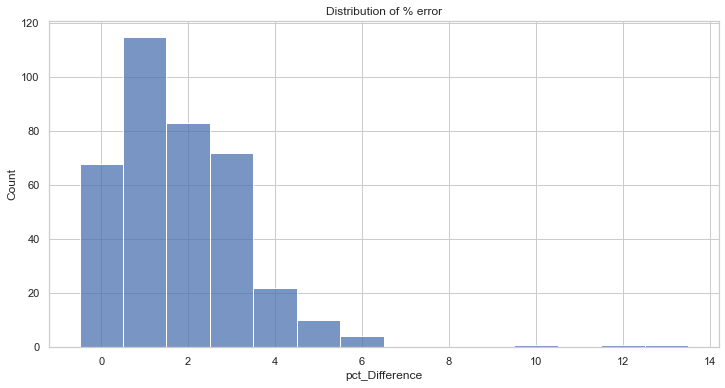

In [110]:
# Distribution of errors
plt.figure(figsize=(12,6))
sns.histplot(data = valid, x = 'pct_Difference', discrete=True, cbar = True)
plt.title('Distribution of % error')
plt.show()


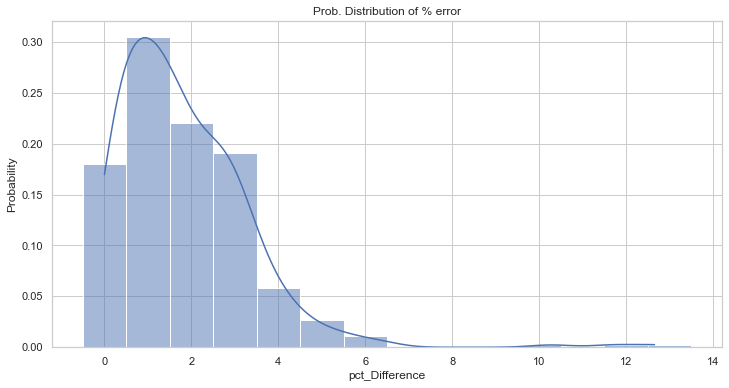

In [111]:
# probability distribution of errors
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.histplot(data = valid, x = 'pct_Difference', kde = True, stat="probability", discrete=True, cbar = True)
plt.title('Prob. Distribution of % error')
plt.show()


the probability of error more than 2.0% price difference is very less, hence the model is well fitted (also the RMS error is very low)